<a href="https://colab.research.google.com/github/ayushwattal/ShopifyChallenge/blob/main/ShopifyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset  = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
dataset

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


Checking for column names and there data types.

In [5]:
# Descibing the dataset to get statistical anlaysis.
dataset.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000



*  As we see stastical analysis of the dataset we see the value of Average Order Value (AOV) = $ 3145.13 is calcualted just the mean of order_amount.

*  It is not an appropriate analysis as some shops (shoe model) might have higher sales as compared to others

*  It does not take different shops sales into account.

* Using min (USD 90) , 50% perctile (USD 284) , 75% percentile (USD 390) and max (USD 704,000) value for order_amount, we can see tha there is huge discrepancy in orde_amount . So we need a new method for evaluation.




In [6]:
df = dataset.sort_values(by="created_at")
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25
...,...,...,...,...,...,...,...
2765,2766,9,708,236,2,debit,2017-03-30 9:22:41
4890,4891,63,853,136,1,cash,2017-03-30 9:27:00
244,245,32,928,202,2,cash,2017-03-30 9:30:28
211,212,22,712,292,2,credit_card,2017-03-30 9:40:40


We can confirm that dataset is for sales from 2017-03-01 - 2017-03-30 (30 days) 

In [7]:
# checking null values in dataset
dataset.isnull().sum() 

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [8]:
# Checking to get unique shop_id 
dataset['shop_id'].nunique()

100

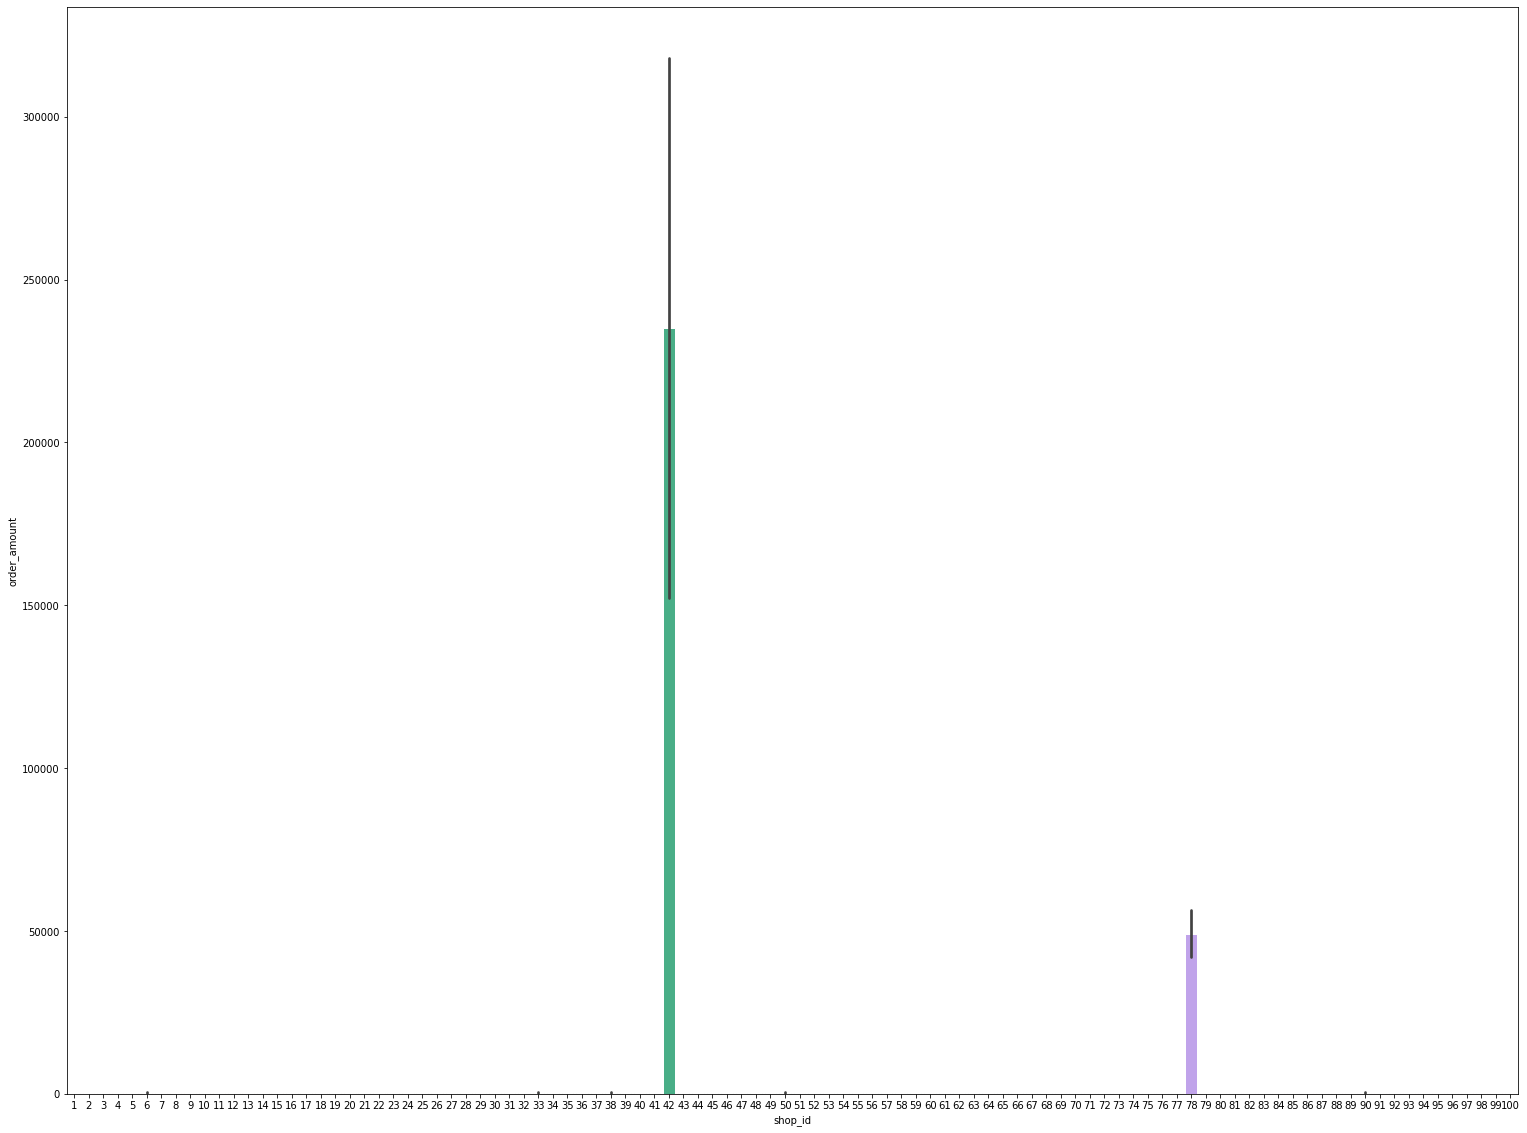

In [9]:
#Plotting Totoal amount od order for each shop
fig,ax = plt.subplots(figsize=(26,20))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=dataset['shop_id'], y=dataset['order_amount'])
plt.show()

As we can see that all shop_id 42 nd 78 has total_amount very big see needs further exploration.

In [17]:
# Grouping shop_id 

# Calculate Total Order Amount and Total Ordered Items for each shop_id
df1 = df.groupby(['shop_id']).agg({'order_amount':'sum', 'total_items':'sum'})

# Calulate Cost per Item using OrderAmount/ TotalOrderItem
df1['amount_per_item'] = df1.apply(lambda x: x['order_amount'] if x['order_amount'] < 1 else x['order_amount']/x['total_items'], axis=1)

# Sorting the dataset based on amount_per_item in ascending order
df1.sort_values(by="amount_per_item",ascending=False)

,order_amount,total_items,amount_per_item
shop_id,,,
78,2263800,88,25725.0
42,11990176,34063,352.0
12,18693,93,201.0
89,23128,118,196.0
99,18330,94,195.0
...,...,...,...
53,14560,130,112.0
100,8547,77,111.0
32,7979,79,101.0




*   Most of the item cost most all shop_id are less than USD 400. 
*   For shop_id 42, amount_per_item is not too high only the total items sold is very high, that most likely means that sneker model sold by that shop is very popular among customers. 
*   For shop_id 78, amount_per_item is USD 257,25 is very huge.

Based on above points we can say that Average Order Value is way high due to items sold by shop_id 78 .

In [20]:
df1['amount_per_item'].describe()

count      100.000000
mean       407.990000
std       2557.462906
min         90.000000
25%        132.750000
50%        153.000000
75%        168.250000
max      25725.000000
Name: amount_per_item, dtype: float64

From above 



1.   Stastical exploration we can see that amount_per_item  standard deviation is very huge . It is due to shop_id 78.
2.   Need to check if there is some erroneous entry for shop_id 78 or just the partiular sneaker model cost is very high. 




In [22]:
# Check for all the orders for shop_id = 78
df.loc[df['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4311,4312,78,960,51450,2,debit,2017-03-01 3:02:10
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25
4412,4413,78,756,51450,2,debit,2017-03-02 4:13:39
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08


It is confirmed that no error entry is present , the cost for model sold by shop_id is 78 (USD 25,725) is very high as comapared to other sneaker models.

### Questions 1 : Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

### Answer : 

> Simply taking average for the entire order_amount is not the correct approach as data has huge discreoency in terms of cost of snaker sold by shop_id 78.


> We can follow two appraches :-


*   Either take the outlier out and then calculate the average and use that value as representation. But in this case we are ignoring some values.
*   Taking the median of order_amount , it helps in getting an estimate idea of Average order Value 











### Questions 2 : What metric would you report for this dataset? 

### Answer : We can used **median (50% percentile)** as a metric for this dataset as it gives general estimate of Average Order Value (AOV). Using this metrics will also incorporate outier cost caused by shop_id :78





In [26]:
dataset.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### Questions 3 :  What is its value?

### Answer : As per metric choosen i.e., median( 50% percentile) the value is **USD 284** using order_amount column . 